# `Titanic Kaggle Contest`
## **Name**: Aryan Racha
## **Branch/Div**: CMPN/C
## **Roll No**: 23102C0055
## **Subject**: ML Lab

# Imports

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Upload Datasets

In [40]:
from google.colab import files

files.upload()

{}

# Load Dataset

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Overview

In [50]:
train.info()
print("\n----------------------------------------------------------------------------------------\n")
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----------------------------------------------------------------------------------------



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization

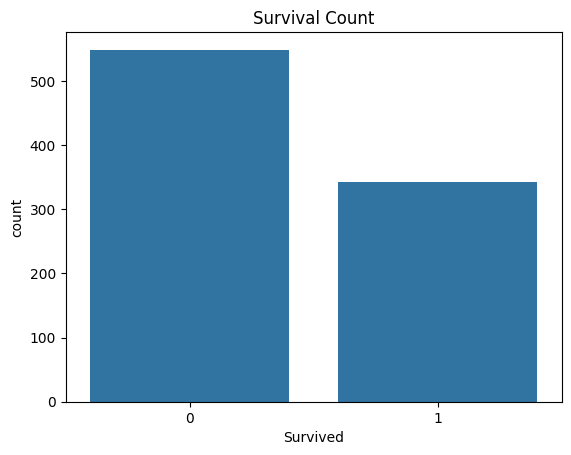

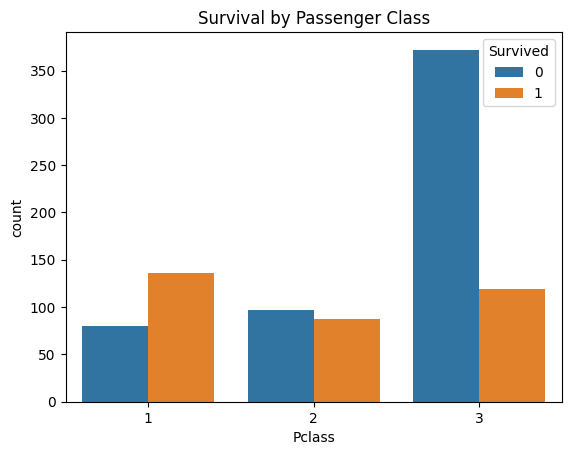

In [55]:
sns.countplot(data=train, x="Survived")
plt.title("Survival Count")
plt.show()

print("\n")

sns.countplot(data=train, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()

# Data Preprocessing

In [56]:
def prepare_data(df):
    df = df.copy()

    # Fill missing values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

    # Simple features
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

    # Title from Name
    df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
    df["Title"] = df["Title"].replace(
        ["Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],
        "Other"
    )
    df["Title"] = df["Title"].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"})

    # Encode Sex
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

    return df

In [57]:
train = prepare_data(train)
test = prepare_data(test)

# One-Hot Encode

In [58]:
train = pd.get_dummies(train, columns=["Embarked", "Title"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked", "Title"], drop_first=True)

# match columns
train, test = train.align(test, join="left", axis=1, fill_value=0)

# Train / Validation Split

In [59]:
y = train["Survived"]

drop_cols = ["Survived", "PassengerId", "Name", "Ticket", "Cabin"]
X = train.drop(columns=drop_cols)

X_test = test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [60]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models

## 1. Logistic Regression

In [61]:
# Logistic Regression (baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_pred))

Logistic Regression Accuracy: 0.7932960893854749


## 2. Random Forest

In [62]:
# Random Forest (main model)
rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=7,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))

Random Forest Accuracy: 0.8324022346368715


# Submission File

In [66]:
rf.fit(X, y)

X_test = X_test.drop(columns=["Survived"], errors="ignore")

final_pred = rf.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": final_pred.astype(int)
})

submission.to_csv("submission.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
